# Derivation of the Cobb- Douglas Economic Model

In this tutorial, we will talk about how economists C. Cobb and P. Douglas derived the model of American economic growth between the year 1899-1922. This model was first introduced in Section 14.1 of Stewart (p.930). Later in Section 14.3 (pp.962-963), how to obtain the model from given assumptions was also explained. 

In what follows, we will see how to construct the model from the dataset and as it was explained in Exercise 14.1.81 parts (b) and (c). First, please download Cobb-DouglasData.csv to your computer, then upload it to the same Jupyter directory that you are currently working on (How to upload files into your directory is explained in the first document about some useful tips for Jupyter Notebooks)

First, we import pandas and numpy packages. Then by using pandas package, we export contents of Cobb-DouglasData.csv as a data frame:

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("Cobb-DouglasData.csv")

df

,Year,P,L,K
0,1899,100,100,100
1,1900,101,105,107
2,1901,112,110,114
3,1902,122,117,122
4,1903,124,122,131
5,1904,122,121,138
6,1905,143,125,149
7,1906,152,134,163
8,1907,151,140,176
9,1908,126,123,185


Now, we take natural log of the quantities L/K and P/K for each year. We will add new columns x and y to the dataframe.

In [2]:
df['x']=round(np.log(df['L']/df['K']),3)
df['y']=round(np.log(df['P']/df['K']),3)

df

,Year,P,L,K,x,y
0,1899,100,100,100,0.000,0.000
1,1900,101,105,107,-0.019,-0.058
2,1901,112,110,114,-0.036,-0.018
3,1902,122,117,122,-0.042,0.000
4,1903,124,122,131,-0.071,-0.055
5,1904,122,121,138,-0.131,-0.123
6,1905,143,125,149,-0.176,-0.041
7,1906,152,134,163,-0.196,-0.070
8,1907,151,140,176,-0.229,-0.153
9,1908,126,123,185,-0.408,-0.384


Cobb and Douglas used least squares linear regression line to construct their model. 

Here, we will find the least squares linear regression line through the points (x,y). This will be a line like, $y=\alpha x+\ln b$ for some $\alpha$ and $b$, to be determined.

For this, we will be using scikit-learn Machine Learning Library for Python. This is the package that you could use for many Machine Learning Tasks. Even though we will only be using regression, you may want to check out what other machine learning models that you could for different purposes. For the scikit-learn package, please take a look at https://scikit-learn.org/stable/ , and for regression documentation, you can visit https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Here is how we construct our model:

In [3]:
# First, import LinearRegression from sklearn.linear_model.
from sklearn.linear_model import LinearRegression

#give a name to LinearRegression function??
linreg=LinearRegression()

#define the x set:
X=df[['x']]

#fit a linear model to points (x,y):
linreg.fit(X,df['y'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
#now, we get the predictions for X by using linreg.predict(X) and record these predictions to the data frame:
pred=linreg.predict(X)
df['predictions']=pred

df

,Year,P,L,K,x,y,predictions
0,1899,100,100,100,0.000,0.000,0.006953
1,1900,101,105,107,-0.019,-0.058,-0.007190
2,1901,112,110,114,-0.036,-0.018,-0.019843
3,1902,122,117,122,-0.042,0.000,-0.024310
4,1903,124,122,131,-0.071,-0.055,-0.045896
5,1904,122,121,138,-0.131,-0.123,-0.090557
6,1905,143,125,149,-0.176,-0.041,-0.124052
7,1906,152,134,163,-0.196,-0.070,-0.138939
8,1907,151,140,176,-0.229,-0.153,-0.163503
9,1908,126,123,185,-0.408,-0.384,-0.296741


Next, let's look at the model and our data by plotting data and the model. For this, we will be using matplotlib package. We will use a scatterplot for the data and a line graph for the model. To distinguish the model from the data, we will color it with red.

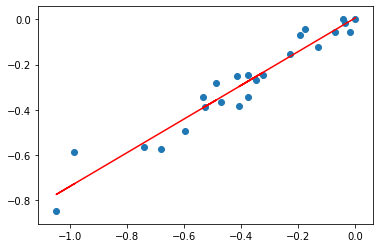

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['predictions'], color='red')

plt.show()

Now, we know that the model seems like a good fit for the data. Usually, this is a long process checking several conditions, but since our aim is how to get Cobb-Douglas model, we will skip that process. Please go over other online tutorials to completely understand conditions required to be able to have a good linear regression model for your data. 

For the Cobb-Douglas model, we need to know the coefficient and the intercept of the linear model. We can get these info by typing the following code. Note that we will be limiting floats to five decimal points for simplicity. We could do this by writing {:0.5f} when we use format with print.

In [7]:
coefficient=linreg.coef_.astype(float)[0]
intercept=linreg.intercept_

print("Coefficient is {:0.5f} and intercept is {:0.5f}".format(coefficient,intercept))

Coefficient is 0.74435 and intercept is 0.00695


Next, we will see how to get the model from this information. Linear regression fitting our data is

y=0.00695+0.74435x

Recall that $y=P/K$ while $x=L/K$. So, the linear regression formula becomes $\ln(P/K)=0.00695+0.74435\ln(L/K)$

Take exponential of both sides

$P/K=e^{0.00695}(L/K)^{0.74435}$

Now, multiply both sides by $K$ and simlify the result to obtain

$P=(1.00697)L^{0.74435}K^{0.25565}$

or $P=(1.01)L^{0.74}K^{0.26}$, which is pretty close to the model that they obtained.

Recall that, the Cobb-Douglas model is $P=(1.01)L^{0.75}K^{0.25}$. The difference is probably due to rounding the digits.